# Clustering: K-means example with iris with exercises

*Alípio Jorge, January 2021, based on different examples from sklearn documentation*

We will use k-means on the Iris data set. The idea of using kmeans on this very old and easy dataset is that we know what the results should look like, even if we are not botanicists. 

We will:
- Use PCA to visualize the 4d data in 2d
- Look at the data with labels and see the three groups (classes)
- Look at the data without labels and see that the number of clusters is not obvious
- Run kmeans with different values of $k$
- Check the cluster tendency (is the dataset clusterable?) using the Hopkins statistic
- Look at extrinsic clustering quality measures
- Look at intrinsic clustering quality measures
- Use the elbow technique on inertia (within cluster error) for deciding the number of clusters (pretending we do not know they are three)
- Use the Silhouette Coeficient to see the quality of the clusters for different values of $k$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

## The ground truth

Iris is a labeled data set. This is not the typical scenario in clustering. But with labelled data we can evaluate better what clustering is doing (and what it should do).

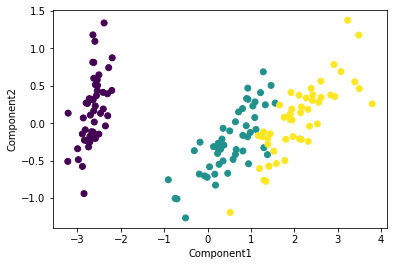

In [3]:
# Visualize the examples in 2D busing PCA - Principal Components Analysis

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

red_X = PCA(n_components=2).fit_transform(X)

plt.scatter(red_X[:,0],red_X[:,1],c=y)

plt.xlabel('Component1')
plt.ylabel('Component2')

plt.show()

## 2 clusters or 3 clusters?

Now imagine you are the botanicist that first studied these species. How many species would you propose for a start? If we plot without labels we observe 2 clusters. 3 clusters are possible (or more) but not very obvious.

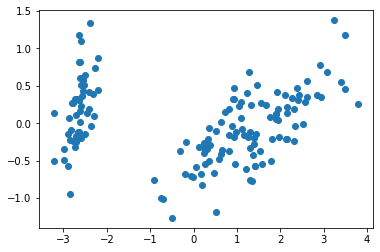

In [4]:
plt.scatter(red_X[:,0],red_X[:,1])

## What is the result with 2 clusters?

We run kmeans for 2 clusters and plot the results.

In [10]:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

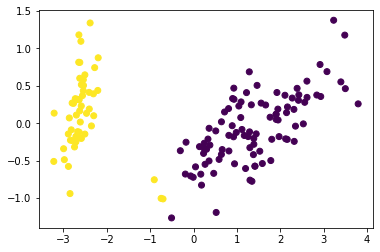

In [11]:
plt.scatter(red_X[:,0],red_X[:,1],c=kmeans.labels_)

## What is the result with 3 clusters?

We run kmeans for 3 clusters and plot the results. You can try with 4, 5 and 6 clusters.

**Exercises:** 
- see the results with different values of $k$
- build a multiplot using subplot that shows the result with different cluster numbers.

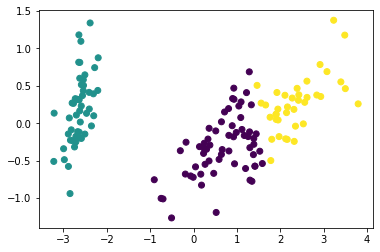

In [25]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(X)
kmeans.labels_
plt.scatter(red_X[:,0],red_X[:,1],c=kmeans.labels_)

Trying other hyper-parameters.
- Initial points can be random or chosen in a smarter way with 'k-means++' option. In this data set we do not see any difference but it may be visible in scenarios where clusters are more overlaped.

**Exercise**: take a look at the other hyperparameters of kmeans and try them on this data. See if they make a difference.

4

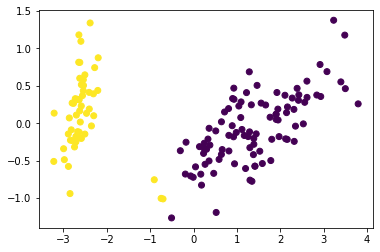

In [38]:
kmeans = KMeans(init='k-means++',n_clusters=2,random_state=4)
kmeans.fit(X)
kmeans.labels_
plt.scatter(red_X[:,0],red_X[:,1],c=kmeans.labels_)
kmeans.n_iter_

## Cluster tendency

We can use an implementation for Hopkins statistic. You may have install `pyclustertend` first in your python environment using conda or pip.

This Hopkins implementation has the opposite orientation of the one described in class. Closer to zero means more clusterable.

**Exercise**: using a random number generator, generate 150 points with uniform distribution and measure the Hokins coefficient on those points. What should the value be?

In [48]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale
# in this implementation hopkins values closer to 0 mean clusterable
hopkins(scale(X),150)

0.17743686135266518

## Extrinsic Measures of quality

Extrinsic measures of quality are possible because we know the labels in this case. As said before, in the real world we typically do not have labels for our data before clustering.

**Exercise**: 
- Look for the precise definition of the metrics and try to understand what they do.
- Plot a curve for each metric along different values of $k$ from 1 to 10. Where is the peak?

In [57]:
from sklearn import metrics

clustering_metrics = [
    ('homog',metrics.homogeneity_score),
    ('complet',metrics.completeness_score),
    ('v_meas',metrics.v_measure_score),
    ('adjust_rand',metrics.adjusted_rand_score),
    ('mutual_info',metrics.adjusted_mutual_info_score),
]


In [68]:
kmeans = KMeans(init='k-means++',n_clusters=2,random_state=4)
kmeans.fit(X)
kmeans.labels_

for (name,m) in clustering_metrics:
    print(name,m(y, kmeans.labels_) )

homog 0.8083138423637096
complet 0.6522113355514314
v_meas 0.7219203867820962
adjust_rand 0.6498176853819967
mutual_info 0.7172081944051019


# Intrinsic measures of quality

Inertia is the within-cluster variability and can be used to measure how points are close to each other in the same cluster. This is maximal with $k=n$. How can we find a non-trivial value for $k$?

**Exercise:** Check the definition of inertia in sklearn documentation.

In [75]:
kmeans = KMeans(init='k-means++',n_clusters=3,random_state=4)
kmeans.fit(X)
kmeans.inertia_

78.851441426146

### The elbow

Let us try the elbow approach.

**Exercise**: run with different starting points. Does the elbow change a lot?

In [80]:
results=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(X)
    results+=[kmeans.inertia_]
results

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.05497786747789,
 34.299712121212146,
 30.337771548626833,
 28.20828363303365]

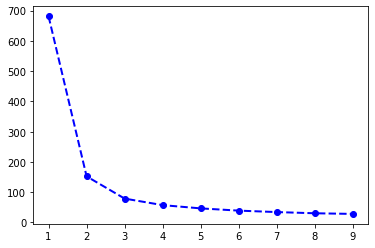

In [96]:
plt.plot(range(1,10), results, 'bo--',linewidth=2, markersize=6)

The elbow is either 2 or 3. Hard to decide.

### Silhouette

What can we learn from the silhouette coefficient?

 **Exercise**: 
 - Run the example with different values of $k$ and compare the average silhouette values and the silhouette plots.
 - Find the elbow for the silhouette coefficient.
 - Show the different silhouette plots (for $m$ different $k$s) on a 1xm panel using subplots. 

In [129]:

k=4

kmeans = KMeans(init='k-means++',n_clusters=k,random_state=4)
kmeans.fit(X)
sil_score=metrics.silhouette_score(X, kmeans.labels_,
                                 metric="euclidean", sample_size=300,)

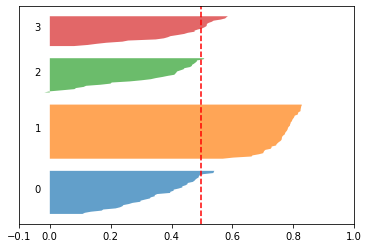

In [130]:
sample_silhouette_values = metrics.silhouette_samples(X, kmeans.labels_)

y_lower = 10
ax=plt.axes()
for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    cluster_labels=kmeans.labels_
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
ax.axvline(x=sil_score, color="red", linestyle="--")
ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);
